# Cluster Profiles
This notebook contains code to analyze Calo Cluster data, in order to check if the data is in order and its distributions.

In [1]:
from boosted_lorenzetti.dataset import LztDataset
from boosted_lorenzetti.utils import set_logger
import boosted_lorenzetti.plotting.pyplot as lplt
import mplhep
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import ROOT
import logging
import numpy as np

In [2]:
ROOT.EnableImplicitMT()
plt.style.use(mplhep.style.ATLAS)
set_logger()
mpl.rc('text', usetex = True)

# Load data

In [3]:
lzt_data = Path.home() / 'data' / 'lorenzetti'
output_dir = lzt_data / 'profiles' / 'minbias-zee-comparison-2025-07-03'
output_dir.mkdir(exist_ok=True, parents=True)
datasets = {}
datasets['zee'] = {
    'ds': LztDataset.from_dir(
        lzt_data / 'v2.2.0' / 'user.joao.pinto.mc25_13TeV.250520.Pythia8EvtGen_Zee.100k'
    ),
    'color': 'blue',
    'label': '$Z \\to ee$',
}

datasets['zee_w_pileup'] = {
    'ds': LztDataset.from_dir(
        lzt_data / 'v2.2.0' / 'user.joao.pinto.mc25_13TeV.250520.Pythia8EvtGen_Zee.100k.avgmu250_sigmamu50'
    ),
    'color': 'red',
    'label': '$Z \\to ee + <\\mu>=250$',
}

datasets

{'zee': {'ds': LztDataset(path=/root/data/lorenzetti/v2.2.0/user.joao.pinto.mc25_13TeV.250520.Pythia8EvtGen_Zee.100k, label=Z->ee),
  'color': 'blue',
  'label': '$Z \\to ee$'},
 'zee_w_pileup': {'ds': LztDataset(path=/root/data/lorenzetti/v2.2.0/user.joao.pinto.mc25_13TeV.250520.Pythia8EvtGen_Zee.100k.avgmu250_sigmamu50, label=Z->ee),
  'color': 'red',
  'label': '$Z \\to ee + <\\mu>=250$'}}

In [4]:
for name, dataset_info in datasets.items():
    logging.info(f'Loading dataset {name}')
    datasets[name]['ntuple_pdf'] = dataset_info['ds'].get_ntuple_pdf()

2025-07-19 01:39:12 | INFO | root | 3153873118 | 2 | Loading dataset zee
2025-07-19 01:39:17 | INFO | root | 3153873118 | 2 | Loading dataset zee_w_pileup


# Cluster Energy

In [5]:
density = True
col_name = 'cl_e'
xlabel = 'Energy [GeV]'

if density:
    filename = 'cl_energy_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_energy_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]/1000
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
            yscale='log'
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
# fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)

2025-07-19 01:39:22 | INFO | root | 1477752478 | 14 | Plotting dataset zee


2025-07-19 01:39:22 | INFO | root | 1477752478 | 14 | Plotting dataset zee_w_pileup


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpvvsfpm6r 379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/courier.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.10 \usepackage
                [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpvvsfpm6r/379ca92578aa0826a50b09264453361a7179308af4c15
da9b1f171466ad7dc54.log.




Error in callback <function _draw_all_if_interactive at 0x7c1895628b80> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpg08p4ne0 379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/courier.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.10 \usepackage
                [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmpg08p4ne0/379ca92578aa0826a50b09264453361a7179308af4c15
da9b1f171466ad7dc54.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp7ydxoz44 379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./379ca92578aa0826a50b09264453361a7179308af4c15da9b1f171466ad7dc54.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-01-21>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/courier.sty)
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/share/texlive/texmf-dist/tex/latex/psnfss/mathptmx.sty)

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.10 \usepackage
                [utf8]{inputenc}^^M
No pages of output.
Transcript written on tmp7ydxoz44/379ca92578aa0826a50b09264453361a7179308af4c15
da9b1f171466ad7dc54.log.




<Figure size 800x600 with 1 Axes>

# Cluster $E_T$

2025-07-04 07:17:19 | INFO | root | 1005904852 | 14 | Plotting dataset zee
2025-07-04 07:17:19 | INFO | root | 1005904852 | 14 | Plotting dataset zee_w_pileup


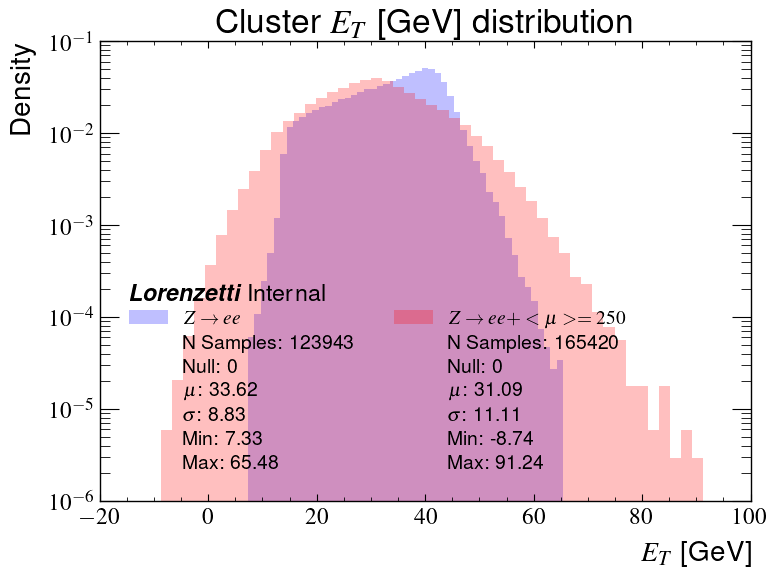

In [6]:
density = True
col_name = 'cl_et'
xlabel = '$E_T$ [GeV]'

if density:
    filename = 'cl_et_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_et_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]/1000
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
            yscale='log'
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)

# Cluster $\eta$

2025-07-04 07:17:38 | INFO | root | 1664840630 | 14 | Plotting dataset zee
2025-07-04 07:17:38 | INFO | root | 1664840630 | 14 | Plotting dataset zee_w_pileup


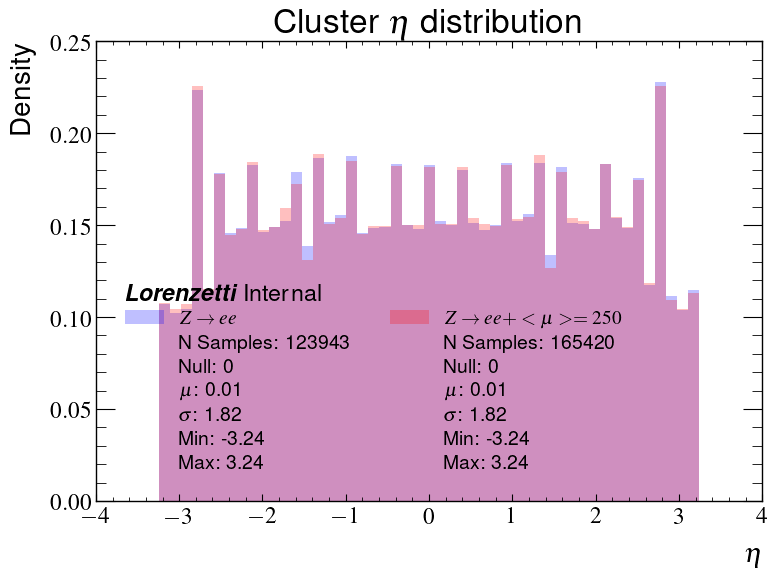

In [8]:
density = True
col_name = 'cl_eta'
xlabel = '$\\eta$'

if density:
    filename = 'cl_eta_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_eta_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)

# Cluster $\phi$

2025-07-04 07:17:25 | INFO | root | 2131440171 | 14 | Plotting dataset zee
2025-07-04 07:17:25 | INFO | root | 2131440171 | 14 | Plotting dataset zee_w_pileup


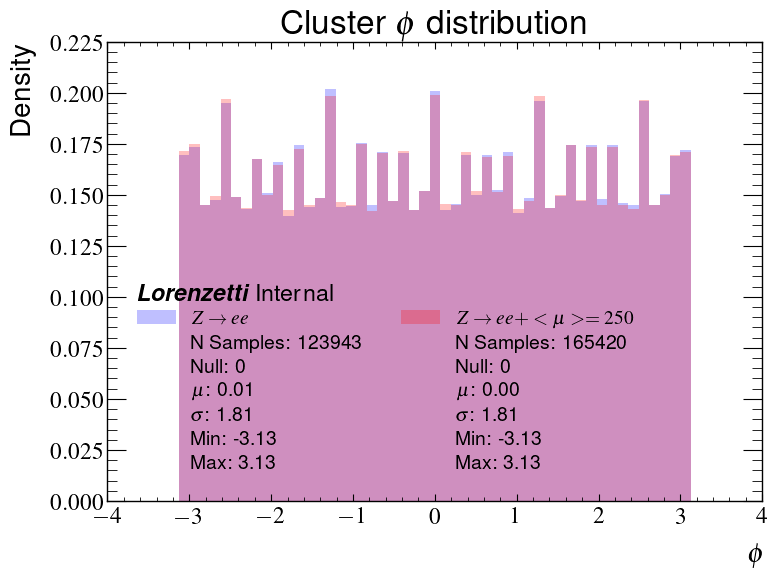

In [7]:
density = True
col_name = 'cl_phi'
xlabel = '$\\phi$'

if density:
    filename = 'cl_phi_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_phi_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    lplt.histplot(
        plotdata.dropna(),
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {plotdata.isnull().sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large')
)
fig.tight_layout()
fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)

# Cluster $E_{ratio}$

2025-07-04 07:18:12 | INFO | root | 2783717022 | 14 | Plotting dataset zee
2025-07-04 07:18:12 | INFO | root | 2783717022 | 14 | Plotting dataset zee_w_pileup


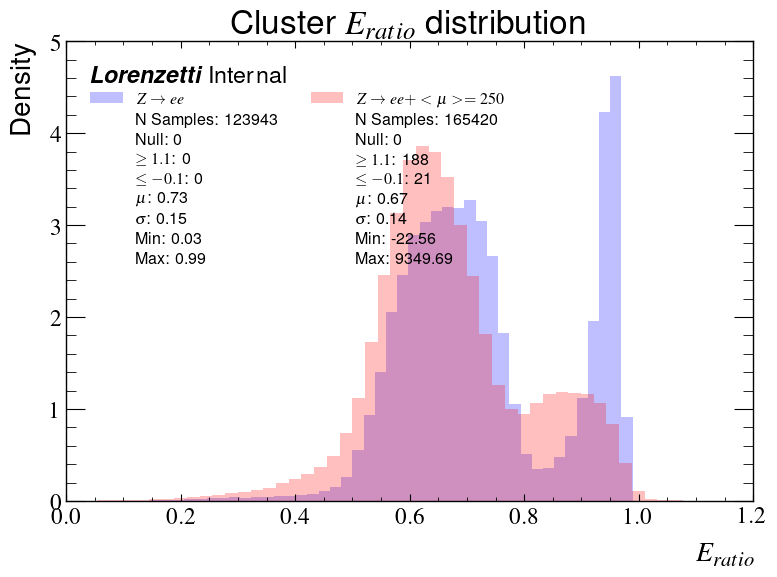

In [9]:
density = True
col_name = 'cl_eratio'
xlabel = '$E_{{ratio}}$'

if density:
    filename = 'cl_eratio_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_eratio_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small',
    loc='upper left'
)

fig.tight_layout()
fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)

2025-07-04 07:19:57 | INFO | root | 3181971799 | 16 | Plotting dataset zee
2025-07-04 07:19:57 | INFO | root | 3181971799 | 16 | Plotting dataset zee_w_pileup


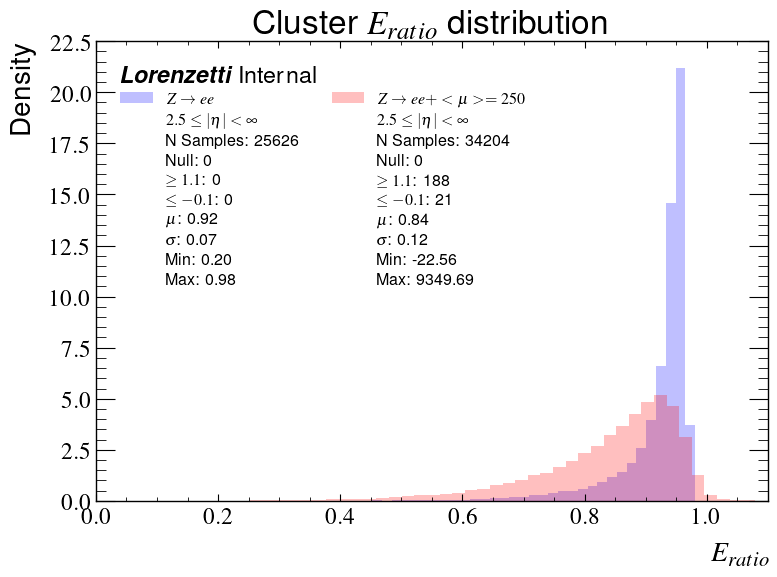

In [14]:
density = True
col_name = 'cl_eratio'
xlabel = '$E_{{ratio}}$'
eta_max = np.inf
eta_min = 2.5

if density:
    filename = f'cl_eratio__abs_cl_eta_min_{eta_min}_eta_max_{eta_max}_distribution_density.png'
    ylabel = 'Density'
else:
    filename = f'cl_eratio__abs_cl_eta_min_{eta_min}_eta_max_{eta_max}_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    abs_eta = dataset_info['ntuple_pdf']['cl_eta'].abs()
    in_eta_range = (abs_eta <= eta_max) & (abs_eta >= eta_min)
    plotdata = plotdata[in_eta_range]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel=ylabel,
            title=f'Cluster {xlabel} distribution',
            xlim=(0,1.1)
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    if eta_max == np.inf:
        str_eta_max = '\\infty'
        connector = '<'
    else:
        str_eta_max = str(eta_max)
        connector = '\\leq'
    ax.plot([], [], ' ', label=f'${eta_min} \\leq |\\eta| {connector} {str_eta_max}$')
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title=('\\textbf{{\\textit{{Lorenzetti}}}} Internal'),
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small',
    loc='upper left'
)
fig.tight_layout()
fig.savefig(output_dir/filename,
            bbox_inches='tight', dpi=300)

## $\eta \times E_{ratio}$

2025-07-04 07:27:20 | INFO | root | 506739488 | 7 | Plotting dataset zee


/tmp/ipykernel_27080/506739488.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  jgrid.figure.tight_layout()


2025-07-04 07:27:20 | INFO | root | 506739488 | 7 | Plotting dataset zee_w_pileup


/tmp/ipykernel_27080/506739488.py:38: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  jgrid.figure.tight_layout()


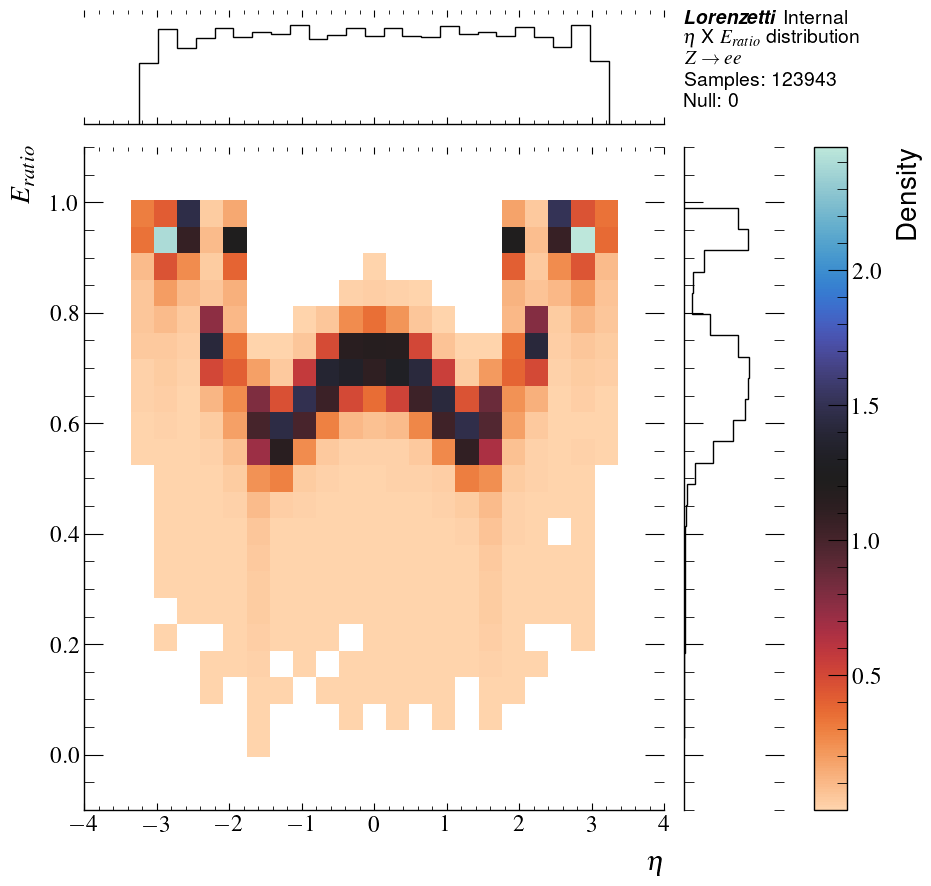

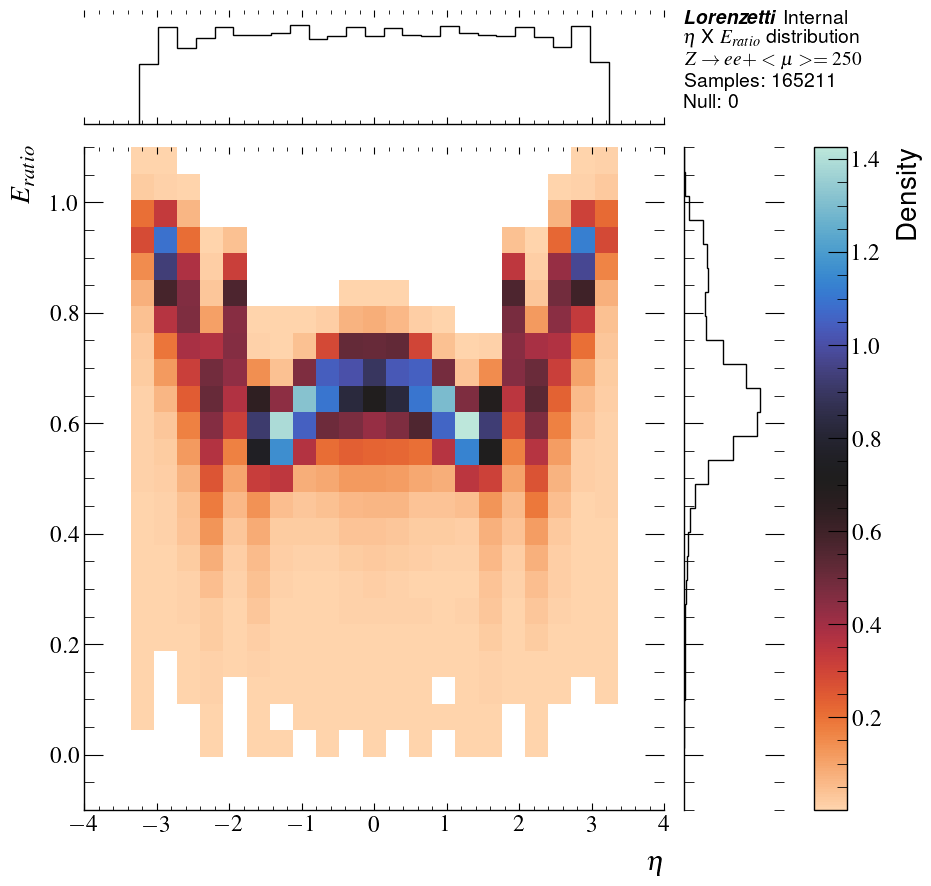

In [15]:
x_col = 'cl_eta'
xlabel = '$\\eta$'
y_col = 'cl_eratio'
ylabel = '$E_{{ratio}}$'

for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    over_limit = dataset_info['ntuple_pdf'][y_col] >= 1.1
    under_limit = dataset_info['ntuple_pdf'][y_col] <= -0.1
    is_null = dataset_info['ntuple_pdf'][y_col].isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = dataset_info['ntuple_pdf'].loc[valid_samples, [x_col, y_col]]
    corner_text = ('\\textbf{{\\textit{{Lorenzetti}}}} Internal\n'
                   f'{xlabel} X {ylabel} distribution\n'
                   f'{dataset_info["label"]}\n'
                   f'Samples: {len(valid_plotdata)}\n'
                   f'Null: {is_null.sum()}')
    jgrid, _ = lplt.hist2dplot(
        valid_plotdata,
        x=x_col,
        xlabel=xlabel,
        xaxis_hist_kwargs=dict(
            bins=25
        ),
        y=y_col,
        ylabel=ylabel,
        ylim=(-0.1, 1.1),
        yaxis_hist_kwargs=dict(
            bins=25
        ),
        joint_hist_kwargs=dict(
            cmap='icefire_r'
        ),
        norm='linear',
        corner_text=corner_text,
        figsize=(10, 10),
    )
    jgrid.figure.tight_layout()
    jgrid.savefig(output_dir / f'{x_col}_{y_col}_{name}_distribution.png', bbox_inches='tight', dpi=300)

# Cluster $R_{had}$

2025-07-04 07:27:27 | INFO | root | 825144674 | 14 | Plotting dataset zee
2025-07-04 07:27:27 | INFO | root | 825144674 | 14 | Plotting dataset zee_w_pileup


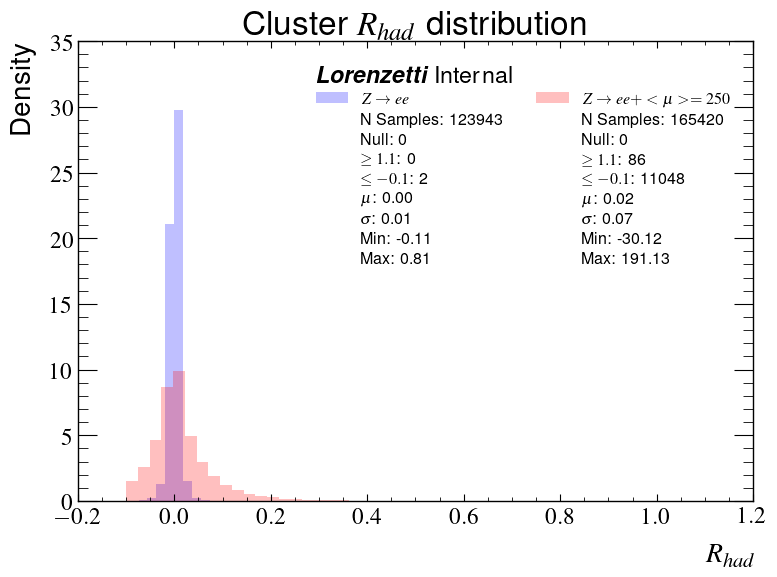

In [16]:
density = True
col_name = 'cl_rhad'
xlabel = '$R_{{had}}$'

if density:
    filename = 'cl_rhad_distribution_density.png'
    ylabel = 'Density'
else:
    filename = 'cl_rhad_distribution.png'
    ylabel = 'Counts'

fig, ax = plt.subplots()
for name, dataset_info in datasets.items():
    logging.info(f'Plotting dataset {name}')
    plotdata = dataset_info['ntuple_pdf'][col_name]
    over_limit = plotdata >= 1.1
    under_limit = plotdata <= -0.1
    is_null = plotdata.isnull()
    valid_samples = ~over_limit & ~under_limit & ~is_null
    valid_plotdata = plotdata[valid_samples]
    lplt.histplot(
        valid_plotdata,
        nbins=50,
        ax=ax,
        metrics=False,
        ax_set=dict(
            xlabel=xlabel,
            ylabel='Density' if density else 'Counts',
            title=f'Cluster {xlabel} distribution',
        ),
        hist_kwargs=dict(
            histtype='stepfilled',
            label=dataset_info['label'],
            color=dataset_info['color'],
            density=density,
            alpha=0.25
        )
    )
    ax.plot([], [], ' ', label=f'N Samples: {len(plotdata)}')
    ax.plot([], [], ' ', label=f'Null: {is_null.sum()}')
    ax.plot([], [], ' ', label=f'$\\geq 1.1$: {over_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\leq -0.1$: {under_limit.sum()}')
    ax.plot([], [], ' ', label=f'$\\mu$: {valid_plotdata.mean():.2f}')
    ax.plot([], [], ' ', label=f'$\\sigma$: {valid_plotdata.std():.2f}')
    ax.plot([], [], ' ', label=f'Min: {plotdata.min():.2f}')
    ax.plot([], [], ' ', label=f'Max: {plotdata.max():.2f}')
ax.legend(
    title='\\textbf{{\\textit{{Lorenzetti}}}} Internal',
    alignment='left',
    facecolor='white',
    ncols=len(datasets),
    title_fontproperties=dict(size='large'),
    fontsize='small'
)
fig.tight_layout()
fig.savefig(output_dir/filename, bbox_inches='tight', dpi=300)